# <font color='green'>Omar Ovalles</font>

Indice:



1.   [Problema Principal](#problema)
2.   [Descripción de los datos](#datos)
3.   [Adquisición de los datos](#adquisicion)
4.   [Data Wrangling](#wrangling)
5.   [EDA (Exploratory Data Analysis)](#eda)
    *   [Parte 1: Análisis univariado](#univariado)
    *   [Parte 2: Análisis Bivariado/Multivariado](#multivariado)
6.   [Preprocesamiento de los datos para modelado](#preprocesamiento)
7.   [Análisis de Coponente Principal (PCA)](#pca)
8.   [Desarrollo del Modelo](#modelos)
    *   [Decision Tree](#tree)
    *   [KNN](#knn)
    *   [SVM (rbf)](#svm)
    *   [Regresión Logística](#logreg)
    *   [Naive Bayes](#naive)
    *   [Random Forest](#forest)
    *   [XGBoost](#xgboost)
    *   [Visualización de los resultados iniciales](#visual)
10.  [Optimización de Hiperparámetros](#hiperparam)
11.  [Predicción Final + Extra](#final)

      
  
  
 




## <font color='lightblue'>Problema Principal</font> <a name="problema"></a>

La cienca de datos ha probado ser bastante útil en proveer una perspectiva nueva a algunos de los problemas más complicados de la actualidad, incluyendo aquellos relacionados con la elaboración de vacunas para diferentes enfermedades cuyos efectos han mostrado ser bastante preocupantes. 

Entre estas enfermedades, se ha destacado la última pandemia declarada por la OMS la cual es la enfermedad Covid-19 ocasionada por el virus SARS-CoV-2. Aprovechando el hecho de que este virus posee características similares a otros que han sido estudiados y tratados con mayor profundidad, se pueden obtener una gran cantidad de datos para ser utilizados en técnicas de análisis y procesamiento para dar información nueva o aproximar nuevos enfoques para el desarrollo de métodos de previsión, prevensión, tratamiento y atenuación de casos de Covid-19.

Se han observado abundantes ejemplos del uso de la ciencia de datos para predecir brotes locales (epidemias) con el objetivo de realizar una mejor adminstración de los recursos para atender los nuevos casos, o incluso se ha utilizado para métodos de diagnóstico más eficientes, sin embargo, un enfoque diferente que se ha utilizado en ambientes privados dentro de empresas farmacéuticas es el de utilizar estos métodos para agilizar el proceso de fabricación de vacunas contra el virus, en este caso nos enfocaremos en este último. 

En el presente proyecto se intentará utilizar los datos presentados en un dataset público (disponible en la plataforma Kaggle) para evaluar la posible existencia de alguna relación entre diferentes propiedades físicas y químicas de compuestos orgánicos que han sido probados en la elaboración de vacunas contra el virus SARS-CoV-2 (causante del Covid 19).

## <font color='lightblue'>Descripción de los datos</font> <a name="datos"></a>

los datos se encuentran inicialmente en tres datasets importados desde Kaggle en formato .csv, los cuales son: 


1.   input_bcell: dataset de entrenamiento general, mostrando propiedaes de péptidos específicos dentro de diferentes proteinas que se identifican como antígenos o generadores de anticuerpos.

2.   input_sars: dataset de entrenamiento que posee solamene una proteína principal (proteína pico del virus SARS).

3.   input_covid: dataset con datos a realizar predicción, contiene la proteína principal (pico) del virus SARS-CoV-2.

La descripción de cada uno de los campos del dataset es la siguiente:







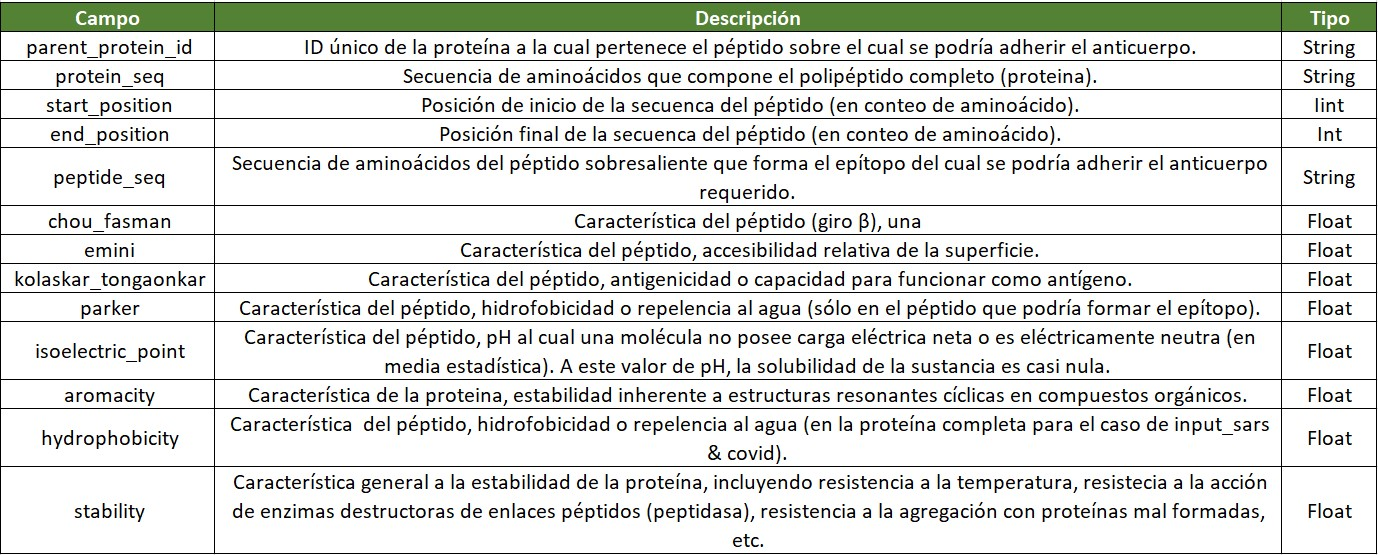

## <font color='lightblue'>Adquisición de los datos</font> <a name="adquisicion"></a>

Ya que el dataset seleccionado pertenece a Kaggle, se utiliza el múdulo de python dedicado para interactuar con la API de Kaggle para descargar la última version del dataset.

In [ ]:
!kaggle datasets files futurecorporation/epitope-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download --unzip futurecorporation/epitope-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_sars = pd.read_csv('input_sars.csv')
df_bcell = pd.read_csv('input_bcell.csv')
df_covid = pd.read_csv('input_covid.csv')

## <font color='lightblue '>Data Wrangling</font> <a name="wrangling"></a> <a name="wrangling"></a>

Se realiza el preprocesamiento de los datos si fuese necesario, en este caso no se encuentran valores faltantes, por lo que se utilizan los datos completos, sin embargo más adelante se puede analizar, entre otras cosas, la existencia de outliers que puedan comprometer la eficaica del método de análisis seleccionado.

In [ ]:
df_bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [ ]:
df_bcell.isnull().sum() #Se observa que no hay valores faltantes en ninguna columna del dataset

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [ ]:
df_sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [ ]:
df_sars.isnull().sum() #Se observa que no hay valores faltantes en ninguna columna del dataset

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [ ]:
df_covid.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603


In [ ]:
df_covid.isnull().sum()     #Se observa que no hay valores faltantes en ninguna columna del dataset

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
dtype: int64

No es necesario reemplazar o filtrar valores faltantes ya que no hay ninguno en los datasets utilizados

## <font color='lightblue'>EDA (Exploratory Data Analysis)</font> <a name="eda"></a>

### Parte 1: Análisis univariado <a name="univariado"></a>

Comenzamos con el análisis univariado en el dataframe más corto (input_sars)

In [ ]:
dataset = pd.concat([pd.read_csv('input_sars.csv'),pd.read_csv('input_bcell.csv')],ignore_index=True)   # Se concatenan los dos datasets que servirán de entrenamiento

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14907 non-null  object 
 1   protein_seq          14907 non-null  object 
 2   start_position       14907 non-null  int64  
 3   end_position         14907 non-null  int64  
 4   peptide_seq          14907 non-null  object 
 5   chou_fasman          14907 non-null  float64
 6   emini                14907 non-null  float64
 7   kolaskar_tongaonkar  14907 non-null  float64
 8   parker               14907 non-null  float64
 9   isoelectric_point    14907 non-null  float64
 10  aromaticity          14907 non-null  float64
 11  hydrophobicity       14907 non-null  float64
 12  stability            14907 non-null  float64
 13  target               14907 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.6+ MB


In [ ]:
dataset.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000
mean,308.845173,319.519420,0.994906,1.082811,1.021808,1.750098,7.015227,0.077143,-0.394063,43.337674,0.271148
std,358.433563,358.647859,0.123656,1.826098,0.053430,1.954424,1.875713,0.026388,0.392808,16.501627,0.444567
min,1.000000,6.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,86.000000,96.000000,0.913000,0.244000,0.987000,0.600000,5.569763,0.062500,-0.600131,31.725753,0.000000
50%,197.000000,208.000000,0.991000,0.551000,1.021000,1.775000,6.447815,0.075949,-0.318259,41.948275,0.000000
75%,400.000000,411.000000,1.073000,1.208500,1.055000,2.960000,8.676575,0.093458,-0.189591,49.101172,1.000000
max,3079.000000,3086.000000,1.546000,40.605000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


Ya que las variables que proporcionan datos valiosos poseen valores numéricos reales, se puede visualizar inicialmente la distribución de cada una de estas variables para analizarlas un poco más a detalle más adelante. igualmente como los datos a utilizar para entrenar el modelo se encuentran en dos datasets, ahora los juntamos para poder tener todos los datos en el mismo lugar

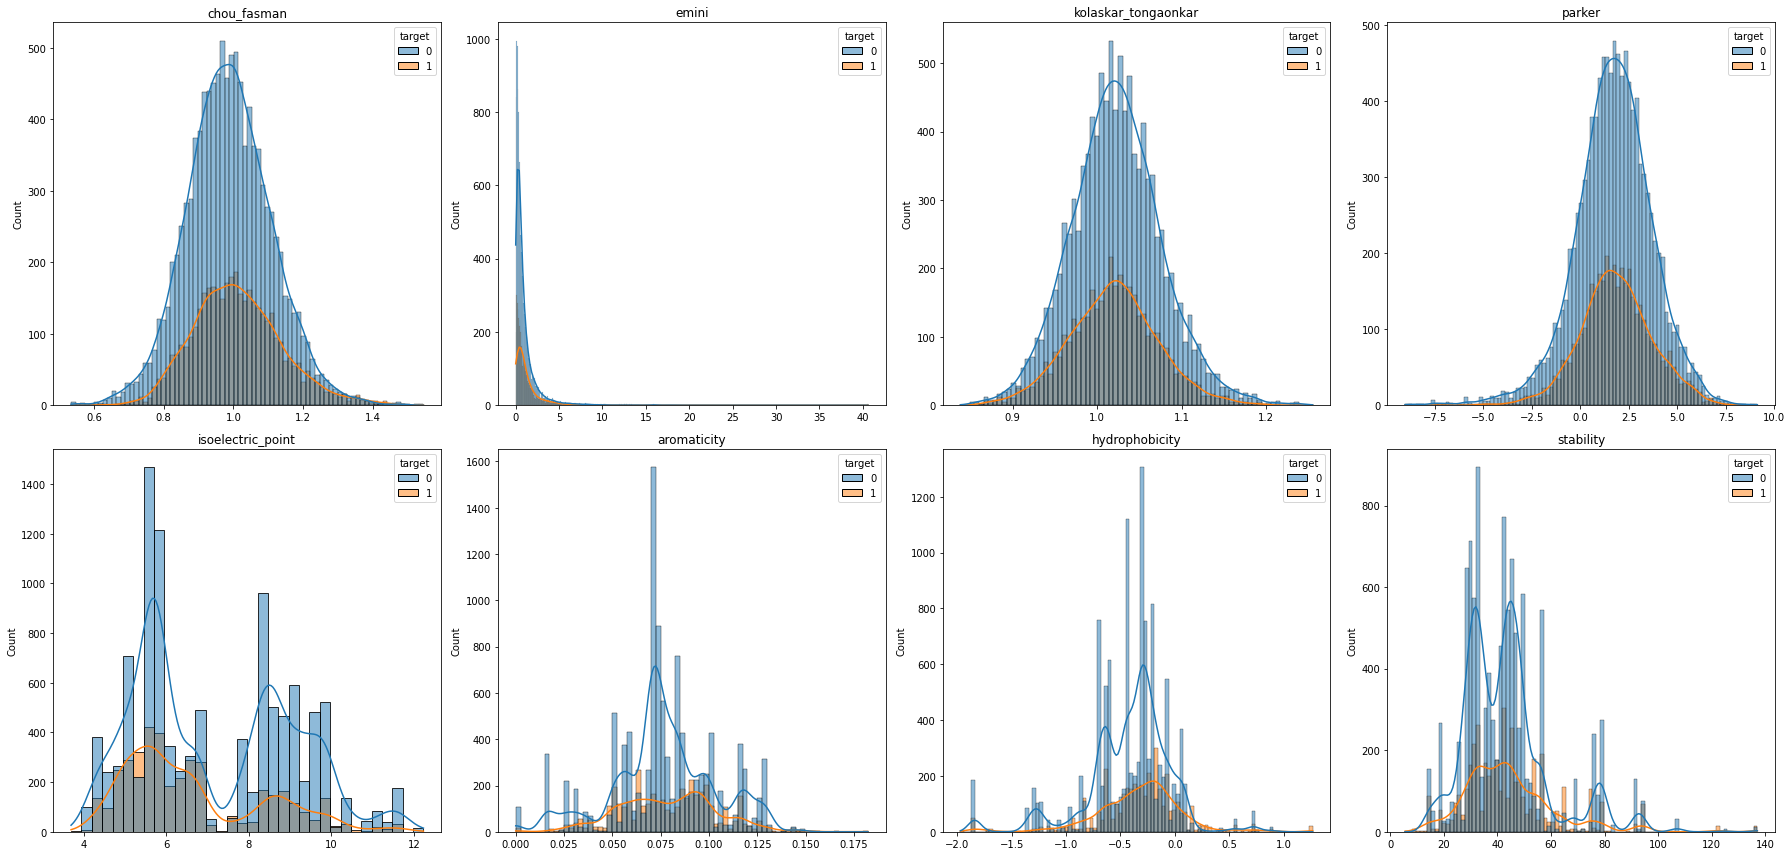

In [ ]:
variables = [ 'chou_fasman',
             'emini',
             'kolaskar_tongaonkar',
             'parker',
             'isoelectric_point',
             'aromaticity',
             'hydrophobicity',
             'stability']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,12))

for current_idx, aux in enumerate(variables):
  i = current_idx // 4
  j = current_idx % 4
  sns.histplot(data=dataset, x=variables[current_idx], kde=True, hue= 'target', ax=axes[i, j])
  axes[i][j].set_title(variables[current_idx])
  axes[i][j].set_xlabel("")

plt.tight_layout()

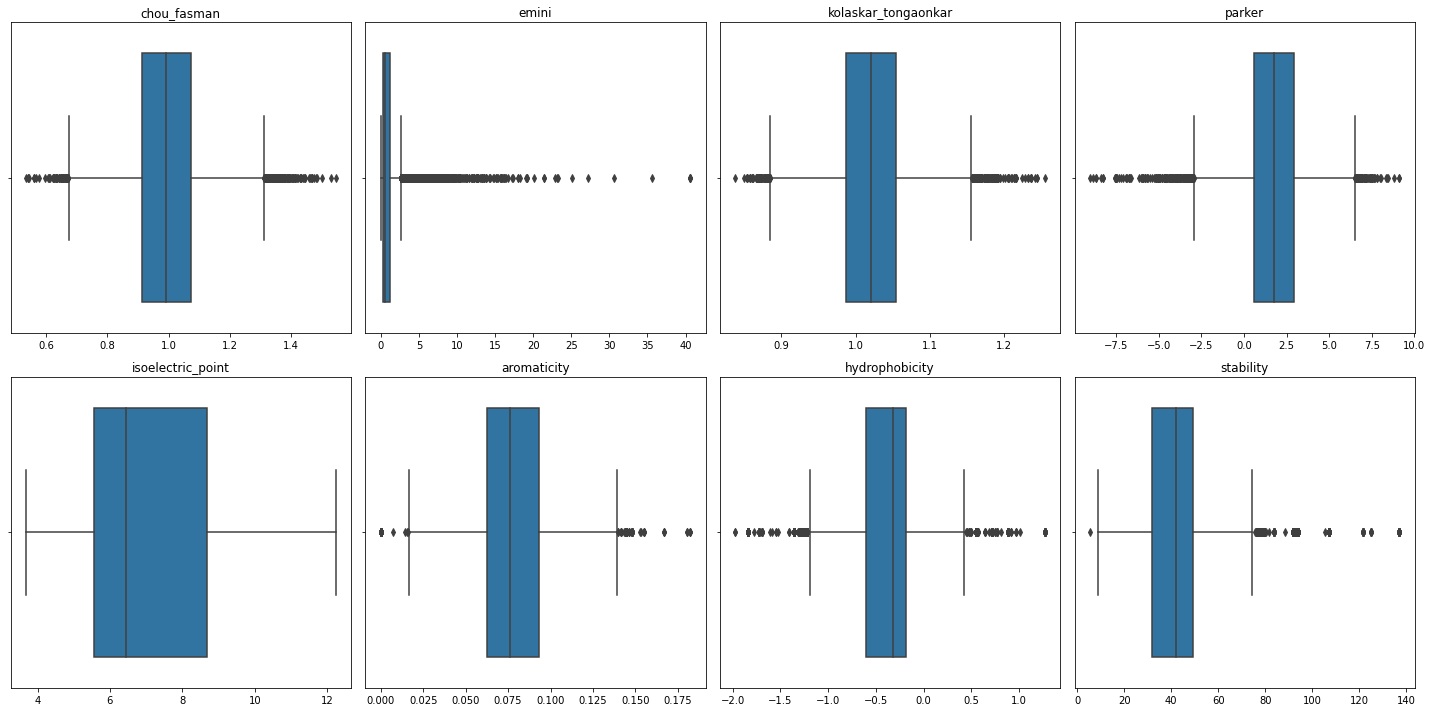

In [ ]:
fig, axes = plt.subplots(len(variables) //4, 4, figsize=(20,10))  #creamos una figura para visualizar las medidas descriptivas de cada distribución

for current_idx, variable in enumerate(variables):  
    i = current_idx // 4
    j = current_idx % 4
    sns.boxplot(x=dataset[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

Selecciono arbitrariamente la variable "Chou_Fasman" que hace referencia a la estabilidad general del compuesto orgánico identificado con la secuencia de aminoácidos en forma de string en la columna "peptide_seq", para realizar un análisis univariado.

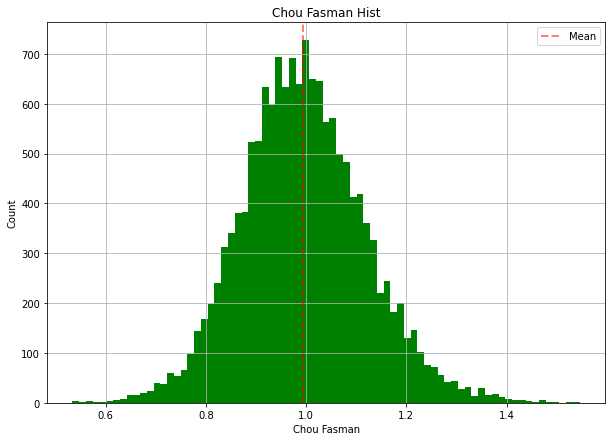

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.hist(dataset["chou_fasman"],bins=75,color='green')
ax.set_title('Chou Fasman Hist')
ax.set_xlabel('Chou Fasman')
ax.set_ylabel('Count')
ax.axvline(dataset.chou_fasman.mean(), color='red',linestyle='--',alpha=0.5,linewidth=2,label='Mean')
ax.grid()
ax.legend()

Se hace lo mismo en seaborn pero resaltando otras características

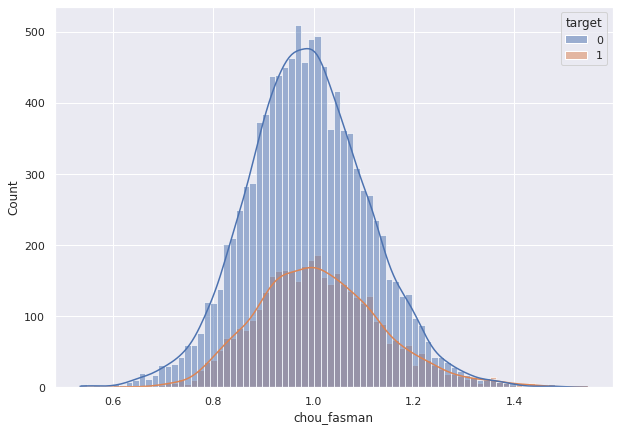

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})

sns.histplot(data=dataset,x="chou_fasman",kde=True,hue='target')

Desde el histograma se observa que la distribución de los valores de la variable se encuentran bastante cercanos a la media por lo que no se asume sesgo, en el siguente boxplot también se observa que existen muchos valores mayores al rango intercuartílico

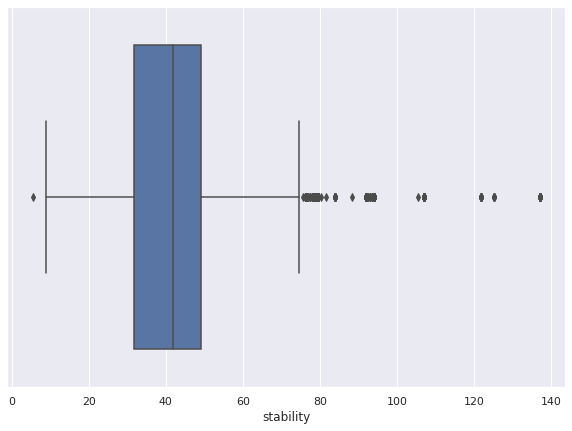

In [ ]:
sns.boxplot(x=dataset["stability"])

Sería importante analizar la distribución de la variable objetivo para asegurarse de que la métrica que se utilizará para la evaluación del modelo final no presente problemas por sesgo debido a cantidad de muestras

In [ ]:
dataset.target.value_counts()

0    10865
1     4042
Name: target, dtype: int64

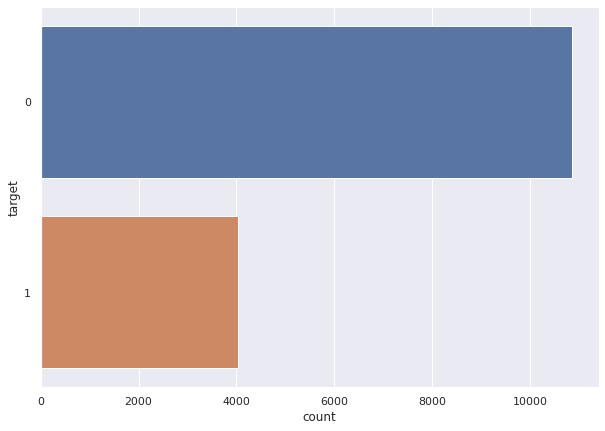

In [ ]:
sns.countplot(y="target", data=dataset)
plt.show()

Basado en el gráfico anterior es importante destacar que los casos en los que la variable objetivo es "1" (representando la viabilidad del epítopo como generador de antocuerpos) es bastante menor comparado con el caso contrario (dado que es binaria). por lo que hay que tener en cuenta que si medimos la efectividad de nuestro modelo seleccionado basado en la especificidad (tasa de negativos) podríamos caer en una trampa al pensar que nuestro modelo identificó correctamente los epítopos que NO sean viables como antígenos como tales, porque existen muchas más muestras de este caso que en el que SI es viable como generador de anticuerpos.

### Parte 2:  Análisis Bivariado/Multivariado <a name="multivariado"></a>

A modo de prueba, analizamos la correlación de Pearson (lineal) ya que la ayoría de variables son de tipo cuantitativa continua (intervalo), excepto la variable objetivo que es categórica.. pero se podrían analizar las relaciones entre las otras variables

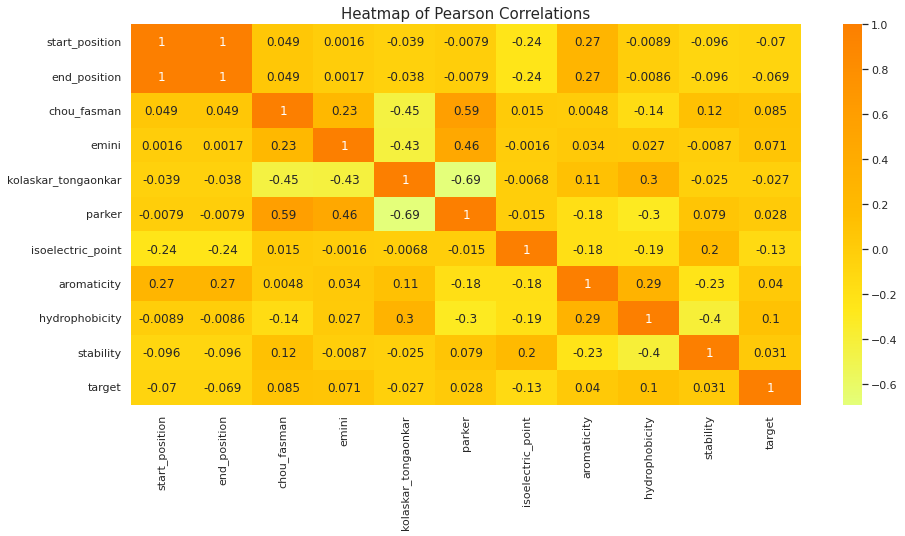

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.heatmap(df_bcell.corr(method="pearson"), annot = True, cmap = 'Wistia')
plt.title('Heatmap of Pearson Correlations', fontsize = 15)
plt.show()

Se evalúa el comportamiento en un scatter plot entre variables con coeficiente de correlación de Pearson mayor

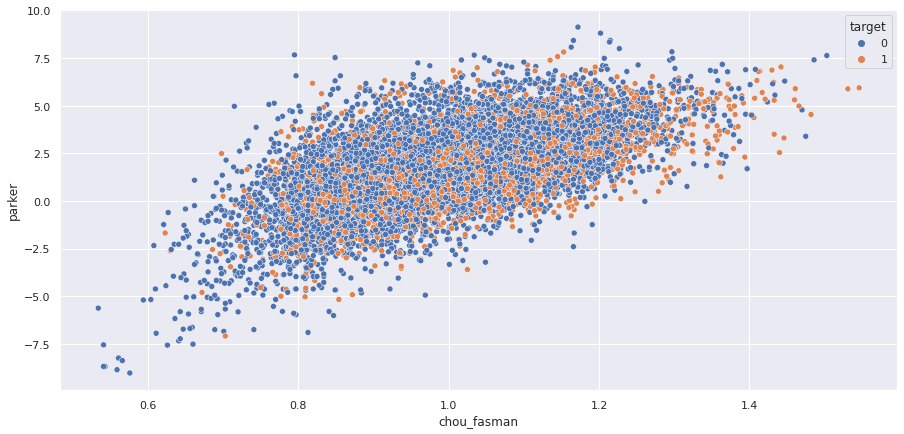

In [ ]:
sns.scatterplot(data=df_bcell,x='chou_fasman', y='parker', hue='target')
plt.show()

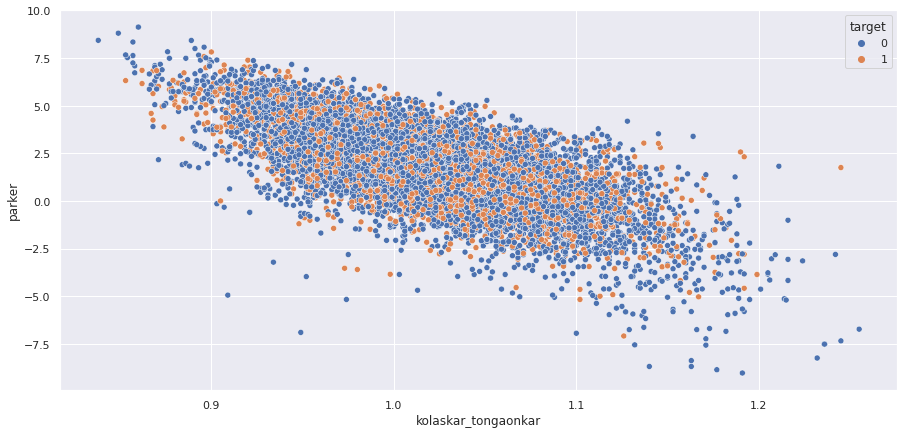

In [ ]:
sns.scatterplot(data=df_bcell,x='kolaskar_tongaonkar', y='parker', hue='target')
plt.show()

No se puede apreciar visualmente una relación muy grande entre estas dos variables, por lo que establecer conclusiones en este punto sería inadecuado.

## <font color='lightblue'> Preprocesamiento de los datos para modelado </font> <a name="preprocesamiento"></a>

In [ ]:
dataset = pd.concat([pd.read_csv('input_sars.csv'),pd.read_csv('input_bcell.csv')],ignore_index=True)   # Se concatenan los dos datasets que servirán de entrenamiento
X = dataset.iloc[:, 5:-1].values    # Se seleccionan únicamente los features relevantes (desde la columna "chou_fasman" hasta "stability")
y = dataset.iloc[:, -1].values      # Se selecciona la variable dependiente o "target"
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14907 non-null  object 
 1   protein_seq          14907 non-null  object 
 2   start_position       14907 non-null  int64  
 3   end_position         14907 non-null  int64  
 4   peptide_seq          14907 non-null  object 
 5   chou_fasman          14907 non-null  float64
 6   emini                14907 non-null  float64
 7   kolaskar_tongaonkar  14907 non-null  float64
 8   parker               14907 non-null  float64
 9   isoelectric_point    14907 non-null  float64
 10  aromaticity          14907 non-null  float64
 11  hydrophobicity       14907 non-null  float64
 12  stability            14907 non-null  float64
 13  target               14907 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.6+ MB


In [ ]:
X.shape

(14907, 8)

In [ ]:
from sklearn.model_selection import train_test_split    #Se separan los datos en sets de entrenamiento y validación en una relación de 80-20, se utiliza la opción "stratify" paramantener la relación entre 
                                                        #la cantidad de valores de la variable dependiente 'target' ya que observamos que se encuentra desbalanceada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
from sklearn.preprocessing import StandardScaler  
# Ya que algunos de los clasificadores que intentaremos utilizar son sensibles a las diferencias entre magnitudes de diferentes features (o incluso el mismo feature con mucha varianza), se realiza un scaling de los sets

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Estos sets se usarán en la sección de PCA y optimización de hiperparámetros

## <font color='lightblue'> Análisis de Coponente Principal (PCA)</font> <a name="pca"></a>

ya que los dos datasets que se usarán de entrenamiento tienen un comportamiento diferente en los últimos 4 features (columnas), porque la proteína principal en el dataset con los datos relacionados al virus SARS es la misma. se intentará obtener un valor de refenrecia con respecto a la contribución de cada feature en la variabilidad de su propia dimensión al realizar un Análisis de Componente Principal en la misma cantida de dimensiones.

In [ ]:
df_sars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    520 non-null    object 
 1   protein_seq          520 non-null    object 
 2   start_position       520 non-null    int64  
 3   end_position         520 non-null    int64  
 4   peptide_seq          520 non-null    object 
 5   chou_fasman          520 non-null    float64
 6   emini                520 non-null    float64
 7   kolaskar_tongaonkar  520 non-null    float64
 8   parker               520 non-null    float64
 9   isoelectric_point    520 non-null    float64
 10  aromaticity          520 non-null    float64
 11  hydrophobicity       520 non-null    float64
 12  stability            520 non-null    float64
 13  target               520 non-null    int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 57.0+ KB


In [ ]:
df_bcell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14387 entries, 0 to 14386
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14387 non-null  object 
 1   protein_seq          14387 non-null  object 
 2   start_position       14387 non-null  int64  
 3   end_position         14387 non-null  int64  
 4   peptide_seq          14387 non-null  object 
 5   chou_fasman          14387 non-null  float64
 6   emini                14387 non-null  float64
 7   kolaskar_tongaonkar  14387 non-null  float64
 8   parker               14387 non-null  float64
 9   isoelectric_point    14387 non-null  float64
 10  aromaticity          14387 non-null  float64
 11  hydrophobicity       14387 non-null  float64
 12  stability            14387 non-null  float64
 13  target               14387 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.5+ MB


In [ ]:
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(df_bcell.iloc[:, 5:-1].values, df_bcell.iloc[:, -1].values, test_size = 0.2, random_state = 0)

sc_b = StandardScaler()
X_b_train = sc_b.fit_transform(X_b_train)
X_b_test = sc_b.transform(X_b_test)

In [ ]:
from sklearn.decomposition import PCA
pca_b = PCA()
X_b_train = pca_b.fit_transform(X_b_train)
X_b_test = pca_b.transform(X_b_test)

pca_b.explained_variance_ratio_*100

array([32.94382767, 20.68519163, 11.09765011, 10.46315442,  9.09785502,
        7.93792522,  4.59842997,  3.17596596])

In [ ]:
components_ = dataset.columns[5:-1]

comp_df_b = pd.DataFrame(list(zip(components_,pca_b.explained_variance_ratio_*100)),columns=["Component","Contribution"])

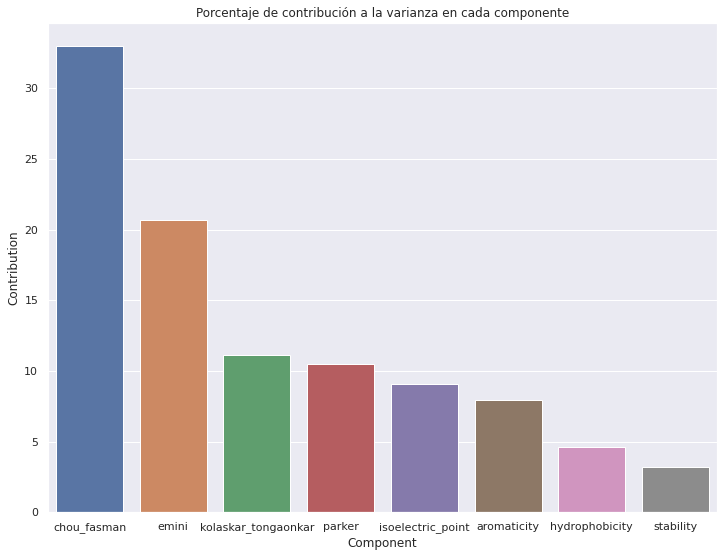

In [ ]:
plt.figure(figsize=(12, 9))

sns.barplot(
    data=comp_df_b,
    x="Component", 
    y="Contribution");

plt.title("Porcentaje de contribución a la varianza en cada componente")
plt.show()

In [ ]:
520/14387*100

3.6143740877180788

Se puede determinar que si bien los últimos cuatro features en uno de los datasets de entrenamiento poseen el mismo valor, estos no representan la mayor variabilidad en su propia dimension, además estos valores duplicados representan menos del 4% de los datos totales

## <font color='lightblue'>Desarrollo del Modelo</font> <a name="modelos"></a>


Inicialmente se utilizarán los algoritmos de clasificación más comunes para calcular la predicción y seleccionará el mejor basado en una parte po el criterio del "accuracy" que representa la relación entre las predicciones correctas entre el total de muestras en el set de entrenamiento con respecto al de prueba y una métrica creada especificamente para este caso de estudio la cual es la cantidad de Falsos Positivos.

Se tratará de evitar que por casualidad la forma de partición de los sets beneficie inesperadamente a algún modelo en específico, por lo que se utiliza una validación cruzada, y la misma se implementará mediante un StratifiedKFold para mantener la proporción de la variable objetivo, la cual observamos que está desbalanceada.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, make_scorer, ConfusionMatrixDisplay

In [ ]:
def custom_scorer(y_true, y_pred):                # definimos un score propio que toma en cuenta solamente la cantidad de "Falsos Positivos"
  FP = confusion_matrix(y_true, y_pred)[0, 1]
  return FP

score_fp = make_scorer(custom_scorer, greater_is_better=False)      # para uso luego del GridSearch, se define el parámetro "greater_is_better=False" para definir que el método de iteración para la optimización 
                                                                    # debería centrarse en disminuir este valor

Para simplificar el proceso de selección inicial del modelo, utilizamos una función personalizada para utilizar el método de Validación Cruzada estratificada para tener en cuenta el desbalance en los valores de la variable objetivo mostrados anteriormente

In [ ]:
def Scores_Calculator(estimator,features,target,splits,pprint=False):

  skf = StratifiedKFold(n_splits=splits)      # Se crea el objeto iterable que contiene los folds con igual proporción entre valores de la variable dependiente
  sc_int = StandardScaler()                   # Se crea un objeto para la normalización o estandarización de los features a utilizar
  

  # se crean listas vacías a las cuales se les agregarán valores correspondientes a diversas métricas

  acc_list = []                               # Accuracy
  pres_list = []                              # Precision
  rec_list = []                               # Recall
  fp_list = []                                # False Positives
  conf_matrix_list_of_arrays = []             # Confusion Matrix en la forma de un array de 2D

  for train_i, test_i in skf.split(X, y):     

    X_train, X_test = X[train_i], X[test_i]   # se crean los sets de entrenamiento y prueba para cada fold
    y_train, y_test = y[train_i], y[test_i]

    estimator.fit(sc_int.fit_transform(X_train), y_train)     # se entrena cada estimador proporcionado a la función definida

    # Se calculan las diferentes métricas

    c_m = confusion_matrix(y_test, estimator.predict(sc_int.transform(X_test)))
    acc = accuracy_score(y_test,estimator.predict(sc_int.transform(X_test)))
    pres = precision_score(y_test,estimator.predict(sc_int.transform(X_test)))
    rec = recall_score(y_test,estimator.predict(sc_int.transform(X_test)))
    fp_ = custom_scorer(y_test,estimator.predict(sc_int.transform(X_test)))

    # Se agregan los valores de las métricas por cada fold a la lista correspondiente

    conf_matrix_list_of_arrays.append(c_m)
    acc_list.append(acc)
    pres_list.append(pres)
    rec_list.append(rec)
    fp_list.append(fp_)
  
  # Se crea un objeto diccionario para ser devuelto por la función

  scores_list = {'name': estimator.__class__.__name__,
                 'CM': np.mean(conf_matrix_list_of_arrays, axis = 0 , dtype = int),
                 'Acc_mean': np.mean(acc_list, axis=0),
                 'Pres_mean': np.mean(pres_list, axis=0),
                 'Rec_mean' : np.mean(rec_list, axis=0),
                 'FP_mean' : abs(np.mean(fp_list, axis=0)),
                 'Acc_std': np.std(acc_list, axis=0),
                 'Pres_std': np.std(pres_list, axis=0),
                 'Rec_std' : np.std(rec_list, axis=0),
                 'FP_std' : abs(np.std(fp_list, axis=0))}

  # Método para imprimir de forma ordenada los resultados de las métricas promedio y sus desviaciones 
  
  if pprint:
    print(estimator.__class__.__name__)
    print("Accuracy: {:.2f} % , ± {:.2f} %".format(scores_list['Acc_mean']*100,scores_list['Acc_std']*100))
    print("Presicion: {:.2f} % , ± {:.2f} %".format(scores_list['Pres_mean']*100,scores_list['Pres_std']*100))
    print("Recall (sensitivity): {:.2f} % , ± {:.2f} %".format(scores_list['Rec_mean']*100,scores_list['Rec_std']*100))
    print("Number of False Positives: {:.0f} , ± {:.0f}".format(scores_list['FP_mean'],scores_list['FP_std']))  
  
  return scores_list

### Decision Tree <a name="tree"></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
scores_tree = Scores_Calculator(estimator = tree, features = X, target = y, splits = 10, pprint = True)


DecisionTreeClassifier
Accuracy: 39.82 % , ± 11.33 %
Presicion: 23.23 % , ± 7.32 %
Recall (sensitivity): 51.31 % , ± 16.34 %
Number of False Positives: 700 , ± 145


### KNN <a name="knn"></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
scores_knn = Scores_Calculator(estimator = knn, features = X, target = y, splits = 10, pprint = True)

KNeighborsClassifier
Accuracy: 52.54 % , ± 8.42 %
Presicion: 22.50 % , ± 5.28 %
Recall (sensitivity): 28.35 % , ± 4.87 %
Number of False Positives: 418 , ± 131


### SVM (rbf) <a name="svm"></a>

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', random_state = 0)

In [ ]:
scores_svm = Scores_Calculator(estimator = svm, features = X, target = y, splits = 10, pprint = True)

SVC
Accuracy: 67.57 % , ± 5.09 %
Presicion: 34.08 % , ± 18.60 %
Recall (sensitivity): 10.34 % , ± 4.30 %
Number of False Positives: 121 , ± 88


### Regresión Logística <a name="logreg"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0)

In [ ]:
scores_log_reg = Scores_Calculator(estimator = log_reg, features = X, target = y, splits = 10, pprint = True)

LogisticRegression
Accuracy: 72.56 % , ± 1.41 %
Presicion: 47.20 % , ± 21.35 %
Recall (sensitivity): 3.49 % , ± 3.64 %
Number of False Positives: 19 , ± 20


### Naive Bayes <a name="naive"></a>

In [ ]:
from sklearn.naive_bayes import GaussianNB

n_b = GaussianNB()

In [ ]:
scores_n_b = Scores_Calculator(estimator = n_b, features = X, target = y, splits = 10, pprint = True)

GaussianNB
Accuracy: 70.26 % , ± 3.19 %
Presicion: 34.26 % , ± 10.77 %
Recall (sensitivity): 7.59 % , ± 2.90 %
Number of False Positives: 70 , ± 49


### Random Forest <a name="forest"></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

r_f = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [ ]:
scores_r_f = Scores_Calculator(estimator = r_f, features = X, target = y, splits = 10, pprint = True)

RandomForestClassifier
Accuracy: 45.92 % , ± 13.14 %
Presicion: 23.93 % , ± 8.88 %
Recall (sensitivity): 40.69 % , ± 12.16 %
Number of False Positives: 566 , ± 182


### XGBoost <a name="xgboost"></a>

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=42,max_depth=6, learning_rate=0.01)

In [ ]:
scores_xgb = Scores_Calculator(estimator = xgb, features = X, target = y, splits = 10, pprint =True)

XGBClassifier
Accuracy: 49.51 % , ± 17.66 %
Presicion: 28.69 % , ± 24.85 %
Recall (sensitivity): 27.71 % , ± 11.48 %
Number of False Positives: 460 , ± 272


Basándonos en la selección por prueba múltiple de diversos algoritmos de clasificación, se decidió continuar con aquellos dos que provean la menor cantidad de "Falsos Positivos" (extraídos de la matriz de confusión con un scorer personalizado) promedio en un método de validación cruzada (Stratified-K-Fold) para luego proceder a optimizar los hiperparámetros y obtener el modelo definitivo.

### Visualización de los resultados iniciales <a name="visual"></a>

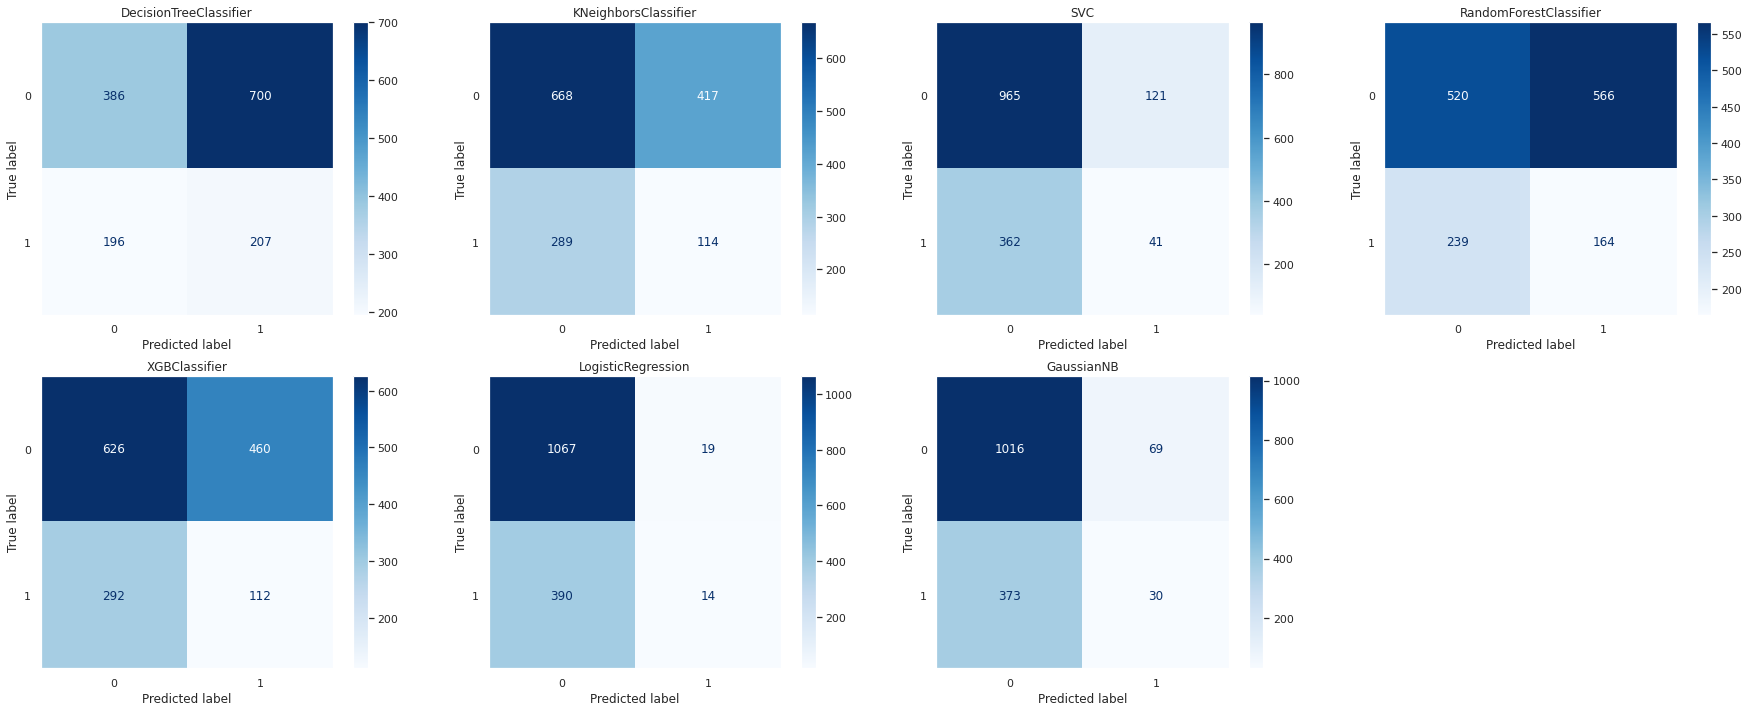

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,10))   # Se crea un plot múltiple para colocar todas las matrices de confusión

scores_cal = [scores_tree, scores_knn, scores_svm, scores_r_f, scores_xgb, scores_log_reg, scores_n_b]
cm_list = [aux['CM'] for aux in scores_cal]
titles = [aux['name'] for aux in scores_cal]

i=0

for sc, ax in zip(cm_list, axes.flatten()):  
    ConfusionMatrixDisplay(sc).plot(cmap='Blues',ax=ax)
    ax.title.set_text(titles[i])
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    i+=1  

axes[-1, -1].axis(False)
plt.tight_layout()
plt.show()


A continuación se utilizarán todos los métodos probados anteriormente para obtener una estimación de las posibilidades de optimización para cada uno de ellos, visualizando todas las curvas ROC en un solo plot.

Para esto no se puede utilizar validación cruzada por lo que se entrena cada estimador con la misma partición aleatoria del dataset.

In [ ]:
tree.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
log_reg.fit(X_train,y_train)
n_b.fit(X_train,y_train)
r_f.fit(X_train,y_train)
xgb.fit(X_train,y_train)

XGBClassifier(learning_rate=0.01, max_depth=6, n_estimators=10, seed=42)

Ya que los dos modelos seleccionados fueron "Regresión Logística" y "Naive Bayes", se grafican sus respectivas curvas ROC.

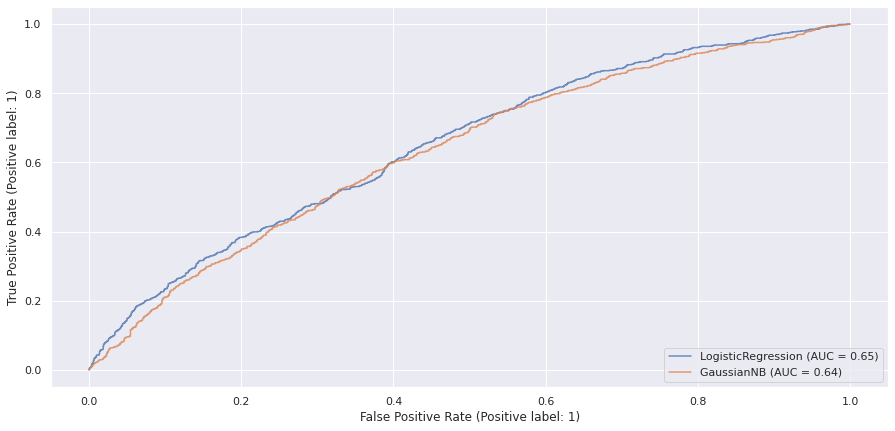

In [ ]:
from sklearn.metrics import RocCurveDisplay

FP_disp = RocCurveDisplay.from_estimator(log_reg, X_test, y_test, alpha=0.8)
RocCurveDisplay.from_estimator(n_b, X_test, y_test, alpha=0.8, ax=FP_disp.ax_)
plt.show()

al observar ambas curvas se puede identificar que poseen características muy similares y es poco probable que se pueda realizar una mejoría significativa en al optimizar los hiperparámetros de ambas, por lo que comparamos lo mismo para todos los modelos anteriores.

In [ ]:
from sklearn.model_selection import StratifiedKFold

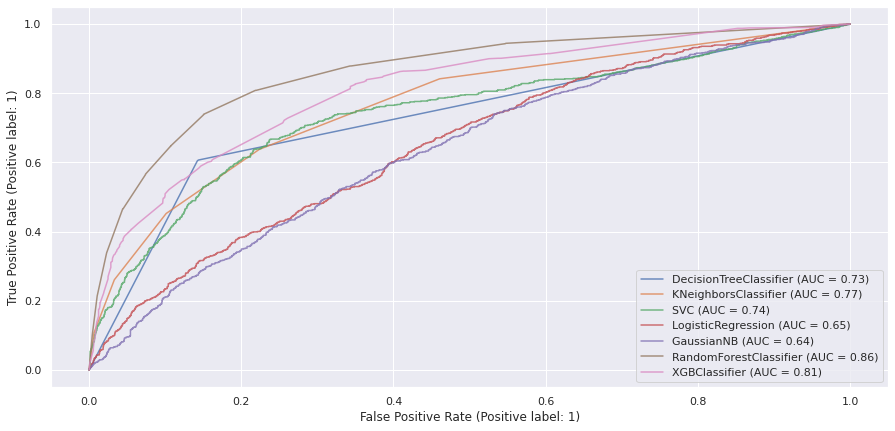

In [ ]:
disp = RocCurveDisplay.from_estimator(tree, X_test, y_test, alpha=0.8)
RocCurveDisplay.from_estimator(knn, X_test, y_test, alpha=0.8, ax=disp.ax_)
RocCurveDisplay.from_estimator(svm, X_test, y_test, alpha=0.8, ax=disp.ax_)
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, alpha=0.8, ax=disp.ax_)
RocCurveDisplay.from_estimator(n_b, X_test, y_test, alpha=0.8, ax=disp.ax_)
RocCurveDisplay.from_estimator(r_f, X_test, y_test, alpha=0.8, ax=disp.ax_)
RocCurveDisplay.from_estimator(xgb, X_test, y_test, alpha=0.8, ax=disp.ax_)
plt.show()

Podríamos inferir que debido a que la curva ROC correspondiente al modelo Random Forest posee un mayor área bajo la curva que la misma para el modelo de Regresión Logística, se podría hipotéticamente obtener una mejor relación entre la tasa de TP/FP incluso teniendo un menor número absoluto de FP.

Es importante resaltar el hecho de que el algoritmo Random Forest tiene la capacidad de sobreajustarse a los datos de entrenamiento y por lo tanto tener mucho sesgo basado en la selección del dataset para tal fin.

## <font color='lightblue'>Optimización de Hiperparámetros</font> <a name="hiperparam"></a>

Primero intentamos optimizar el modelo basado en Random Forest:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_estimators': (1,5,10,15,20), 
              'criterion': ('gini', 'entropy'),
              'class_weight':('balanced', 'balanced_subsample'),}


r_f_grid = GridSearchCV(estimator = RandomForestClassifier(random_state=0),
                        param_grid = parameters,
                        scoring = score_fp,
                        cv = 10,
                        n_jobs = -1)
r_f_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': ('balanced', 'balanced_subsample'),
                         'criterion': ('gini', 'entropy'),
                         'n_estimators': (1, 5, 10, 15, 20)},
             scoring=make_scorer(custom_scorer, greater_is_better=False))

In [ ]:
print("Accuracy: ", accuracy_score(y_test,r_f_grid.predict(X_test)))
print("Precision: ",precision_score(y_test,r_f_grid.predict(X_test)))
print("Recall: ",recall_score(y_test,r_f_grid.predict(X_test)))
print("AUC (ROC): ",roc_auc_score(y_test,r_f_grid.predict(X_test)))

Accuracy:  0.8360160965794768
Precision:  0.7515723270440252
Recall:  0.5908529048207664
AUC (ROC):  0.7590711831973136


In [ ]:
print('FP on train set: ',abs(r_f_grid.best_score_))
print('Best Parameters: ', r_f_grid.best_params_)

print('Confusion Matrix for test set: \n', confusion_matrix(y_test, r_f_grid.predict(X_test)))

FP on train set:  60.4
Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'n_estimators': 20}
Confusion Matrix for test set: 
 [[2015  158]
 [ 331  478]]


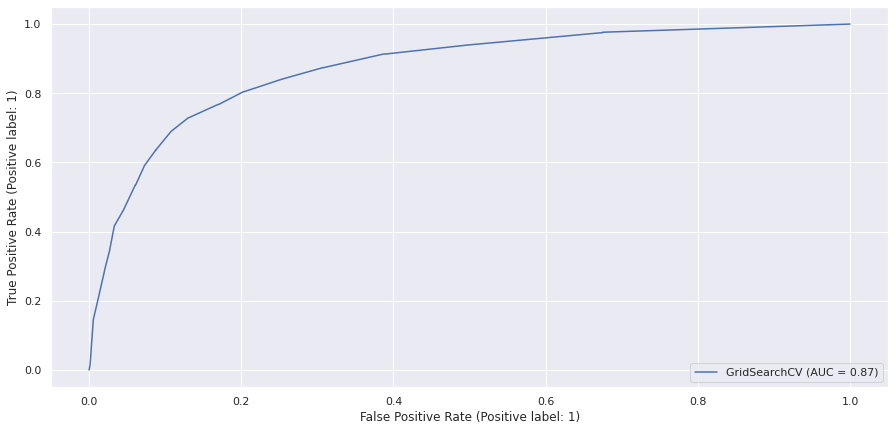

In [ ]:
RocCurveDisplay.from_estimator(r_f_grid,X_test,y_test)
plt.show()

Luego se procede a realizar lo mismo para el modelo de Regresión Logística.

In [ ]:
parameters = [{'solver': ['newton-cg'], 'penalty': ['l2']},
              {'solver': ['lbfgs'], 'penalty': ['l2']},
              {'solver': ['liblinear'], 'penalty': ['l1','l2']},
              {'solver': ['sag'], 'penalty': ['l2']},
              {'solver': ['saga'], 'penalty': ['elasticnet','l1','l2']}
              ]


log_reg_grid = GridSearchCV(estimator = LogisticRegression(random_state=0),
                        param_grid = parameters,
                        scoring = score_fp,
                        cv = 10,
                        n_jobs = -1)
log_reg_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1473, in fit
    % self.l1_ratio
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid=[{'penalty': ['l2'], 'solver': ['newton-cg']},
                         {'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'penalty': ['l2'], 'solver': ['sag']},
                         {'penalty': ['elasticnet', 'l1', 'l2'],
                          'solver': ['saga']}],
             scoring=make_scorer(custom_scorer, greater_is_better=False))

algunas de las iteraciones para la optimización de este modelo dieron advertencias por calcularse un "penalty" L1 no válido.

In [ ]:
print("Accuracy: ", round(accuracy_score(y_test,log_reg_grid.predict(X_test))*100,2))
print("Precision: ",round(precision_score(y_test,log_reg_grid.predict(X_test))*100,2))
print("Recall: ",round(recall_score(y_test,log_reg_grid.predict(X_test))*100,2))
print("AUC (ROC): ",roc_auc_score(y_test,log_reg_grid.predict(X_test)))

Accuracy:  73.27
Precision:  63.64
Recall:  3.46
AUC (ROC):  0.5136237689545308


In [ ]:
print('FP on train set: ',abs(log_reg_grid.best_score_))
print('Best Parameters: ', log_reg_grid.best_params_)

print('Confusion Matrix for test set: \n', confusion_matrix(y_test, log_reg_grid.predict(X_test)))

FP on train set:  8.6
Best Parameters:  {'penalty': 'l1', 'solver': 'liblinear'}
Confusion Matrix for test set: 
 [[2157   16]
 [ 781   28]]


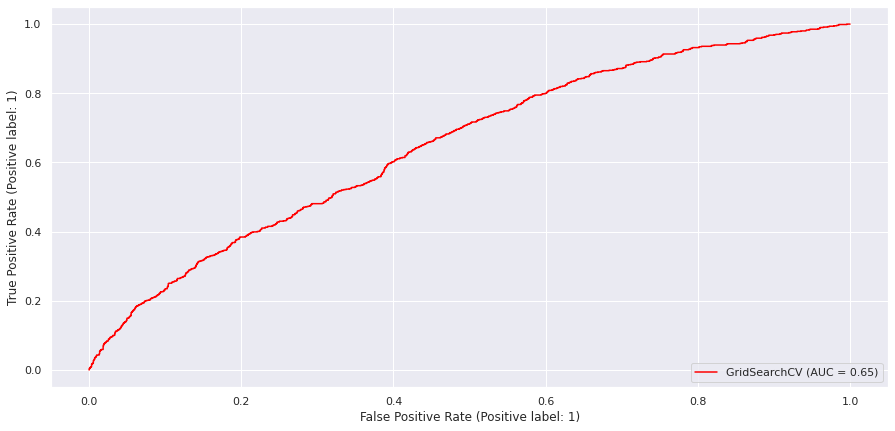

In [ ]:
RocCurveDisplay.from_estimator(log_reg_grid, X_test, y_test, color='red')
plt.show()

## <font color='lightblue'>Predicción Final</font> <a name="final"></a>

Según lo observado en las últimas dos secciones, se podría concluir que, para este caso y siguiendo esta metodología, el algoritmo que presenta las mejores métricas basándose únicamente en la minimización de la cantidad absoluta de "Falsos Positivos" es la Regresión Logística, realizando la optimización de hiperparámetros por el método de "Grid Search", se obtuvo el modelo a utilizar en nuestro dataset de datos reales (sin muestras de la variable objetivo):

In [ ]:
log_reg_grid.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
df_covid.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603


In [ ]:
X_covid = df_covid.iloc[:, 5: ].values    # Se seleccionan únicamente los features relevantes (desde la columna "chou_fasman" hasta "stability")

In [ ]:
from sklearn.preprocessing import StandardScaler  
# se realiza un scaling de los features para facilitar el modelado

sc_covid = StandardScaler()
X_covid = sc_covid.fit_transform(X_covid)

In [ ]:
viable_epitope = pd.DataFrame(log_reg_grid.predict(X_covid),columns=['target'])
viable_epitope.value_counts()

target
0         20262
1            50
dtype: int64

Según el modelo optimizado de regresión logística, se predijeron 50 secuencias de aminoácidos posiblemente viables para ser regiones epítopos en la proteína principal del virus SARS-CoV-2 (6VYB_A). 

A continuación vamos a tratar de identificar estas secuencias y mostrarlas en una tabla:

In [ ]:
indexes = viable_epitope[viable_epitope["target"] == 1].index

In [ ]:
print(df_covid.iloc[indexes,2:5].to_string(index=False))

 start_position  end_position           peptide_seq
            455           459                 WNSNN
            163           170              YYHKNNKS
            826           833              PDPSKPSK
            827           834              DPSKPSKR
            828           835              PSKPSKRS
            826           834             PDPSKPSKR
            827           835             DPSKPSKRS
            825           834            LPDPSKPSKR
            826           835            PDPSKPSKRS
            825           835           LPDPSKPSKRS
            826           836           PDPSKPSKRSF
           1172          1182           DKYFKNHTSPD
            163           175         YYHKNNKSWMESE
            164           177        YHKNNKSWMESEFR
            826           839        PDPSKPSKRSFIED
           1168          1181        KEELDKYFKNHTSP
           1169          1182        EELDKYFKNHTSPD
            163           177       YYHKNNKSWMESEFR
           1

## (Extra) Comparación y unión con Random Forest

In [ ]:
viable_epitope_2 = pd.DataFrame(r_f_grid.predict(X_covid),columns=['target'])
viable_epitope_2.value_counts()

target
0         13646
1          6666
dtype: int64

observamos que el método de Random Forest optimizado obtiene un total de más de 6000 prediciiones consideradas como regiones viables, por lo que utilizaremos la unión entre estas predicciones y las del modelo anterior para verificar si existen predicciones comunes.

In [ ]:
indexes_2 = viable_epitope_2[viable_epitope_2["target"] == 1].index

In [ ]:
joint = [aux for aux in indexes_2 if aux in indexes]

In [ ]:
len(joint)

32

Se observa que hubo 32 predicciones dadas como secuencias viables utilizando dos modelos con características diferentes pero complementarias.

In [ ]:
print(df_covid.iloc[joint,2:5].to_string(index=False))

 start_position  end_position           peptide_seq
            828           835              PSKPSKRS
            825           834            LPDPSKPSKR
            826           839        PDPSKPSKRSFIED
           1168          1181        KEELDKYFKNHTSP
           1169          1182        EELDKYFKNHTSPD
           1168          1182       KEELDKYFKNHTSPD
           1165          1180      DSFKEELDKYFKNHTS
           1167          1182      FKEELDKYFKNHTSPD
           1161          1177     QPELDSFKEELDKYFKN
           1165          1181     DSFKEELDKYFKNHTSP
           1166          1182     SFKEELDKYFKNHTSPD
           1168          1184     KEELDKYFKNHTSPDVD
            163           180    YYHKNNKSWMESEFRVYS
           1161          1178    QPELDSFKEELDKYFKNH
           1162          1179    PELDSFKEELDKYFKNHT
           1165          1182    DSFKEELDKYFKNHTSPD
            163           181   YYHKNNKSWMESEFRVYSS
           1158          1176   DPLQPELDSFKEELDKYFK
           1